# 第四堂

## 協方差與相關係數

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

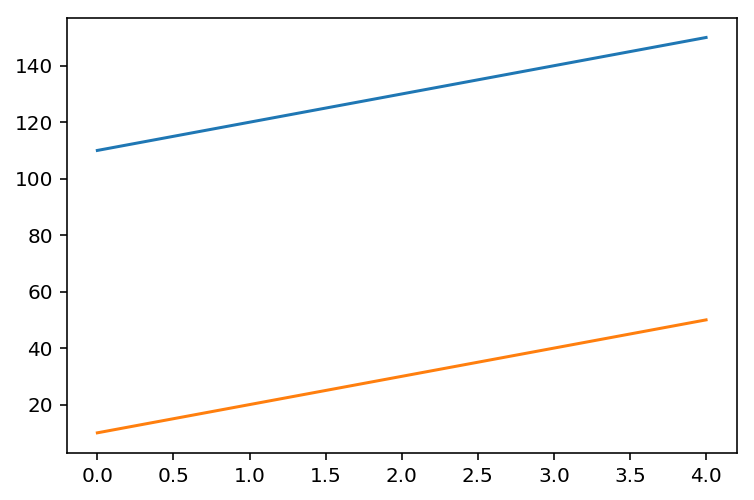

In [62]:
np1=np.array([110,120,130,140,150])
np2=np.array([10,20,30,40,50])
plt.plot(np1)
plt.plot(np2)
plt.show()

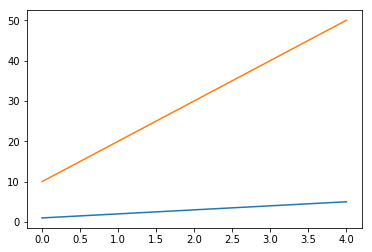

In [5]:
np1=np.array([1,2,3,4,5])
np2=np.array([10,20,30,40,50])
plt.plot(np1)
plt.plot(np2)
plt.show()

In [6]:
#協方差
np.cov(np1,np2)

array([[  2.5,  25. ],
       [ 25. , 250. ]])

In [7]:
#相關係數
np.corrcoef(np1,np2)

array([[1., 1.],
       [1., 1.]])

In [11]:
a=pd.DataFrame(np1)
b=pd.DataFrame(np2)
a[0].corr(b[0])

1.0

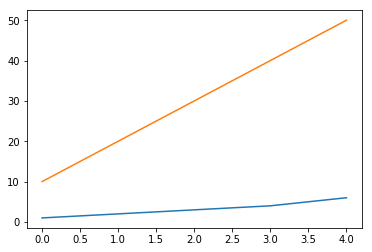

In [12]:
np1=np.array([1,2,3,4,6])
np2=np.array([10,20,30,40,50])
plt.plot(np1)
plt.plot(np2)
plt.show()

In [13]:
a=pd.DataFrame(np1)
b=pd.DataFrame(np2)
a[0].corr(b[0])

0.9863939238321436

## 分散點補充

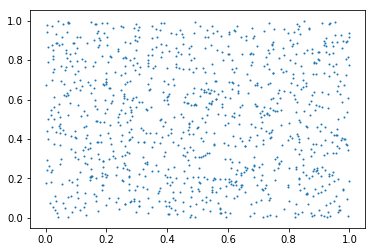

In [17]:
a=np.random.random((2,1000))
plt.scatter(a[0],a[1],s=1)
plt.show()

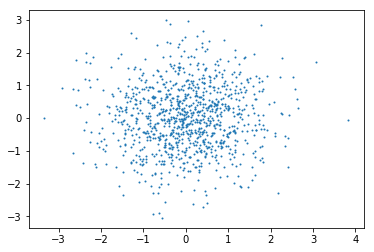

In [18]:
a=np.random.randn(2,1000)
plt.scatter(a[0],a[1],s=1)
plt.show()

## 數據標準化

In [21]:
a=np.array([1,2,3,4,5])
b=np.array([10,20,30,40,50])
a1=(a-a.mean())/a.std()
b1=(b-b.mean())/b.std()
print(a1)
print(b1)


[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


## 從散點求出趨勢線

In [35]:
#假設拿到多項目的數據組
a=np.random.random(1000).reshape(100,10)
df=pd.DataFrame(a,columns=list('ABCDEFGHIJ'))
df=df.rename(columns={'J':'price'})
df.head()

A         B         C         D         E         F         G  \
0  0.860606  0.260790  0.544822  0.214572  0.518801  0.086551  0.879001   
1  0.979180  0.839013  0.471814  0.441805  0.868833  0.733013  0.122667   
2  0.119251  0.009727  0.084838  0.317721  0.880200  0.226507  0.287004   
3  0.286152  0.476175  0.849204  0.283912  0.668931  0.847063  0.391891   
4  0.222129  0.216442  0.656536  0.528475  0.185234  0.475606  0.977740   

          H         I     price  
0  0.131413  0.830584  0.559569  
1  0.773959  0.512523  0.789306  
2  0.027998  0.523080  0.915956  
3  0.734451  0.728913  0.117491  
4  0.105866  0.297119  0.644970

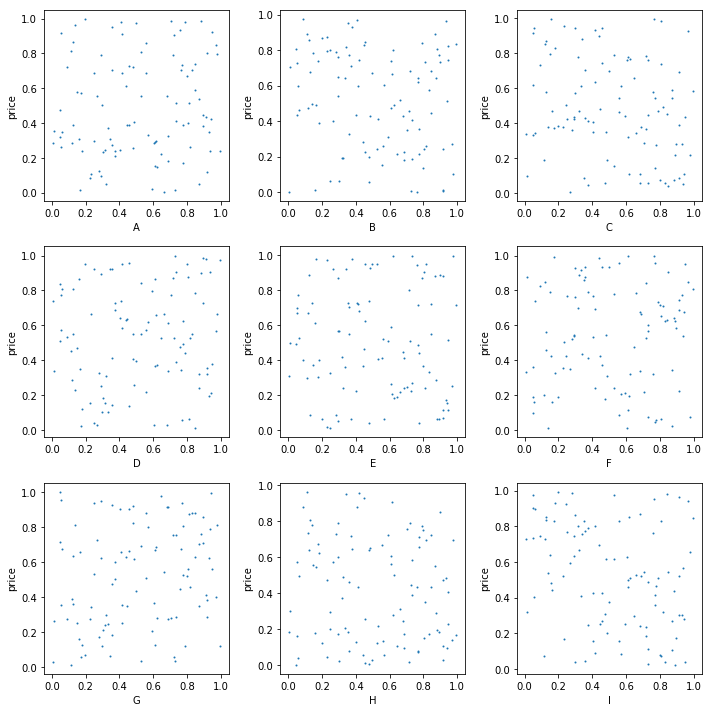

In [47]:
#寫迴圈把圖表畫出來
plt.figure(figsize=(10,10))
for i in range(len(df.columns)-1):
    dd=df[df.columns[i]]
    plt.subplot(3,3,i+1)
    plt.scatter(df['price'],dd,s=1)
    plt.ylabel('price')
    plt.xlabel(df.columns[i])
plt.tight_layout()
plt.show()
    

In [48]:
from sklearn.datasets import load_boston

In [49]:
a=load_boston()

In [53]:
a

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [56]:
df=pd.DataFrame(a.data,columns=a.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

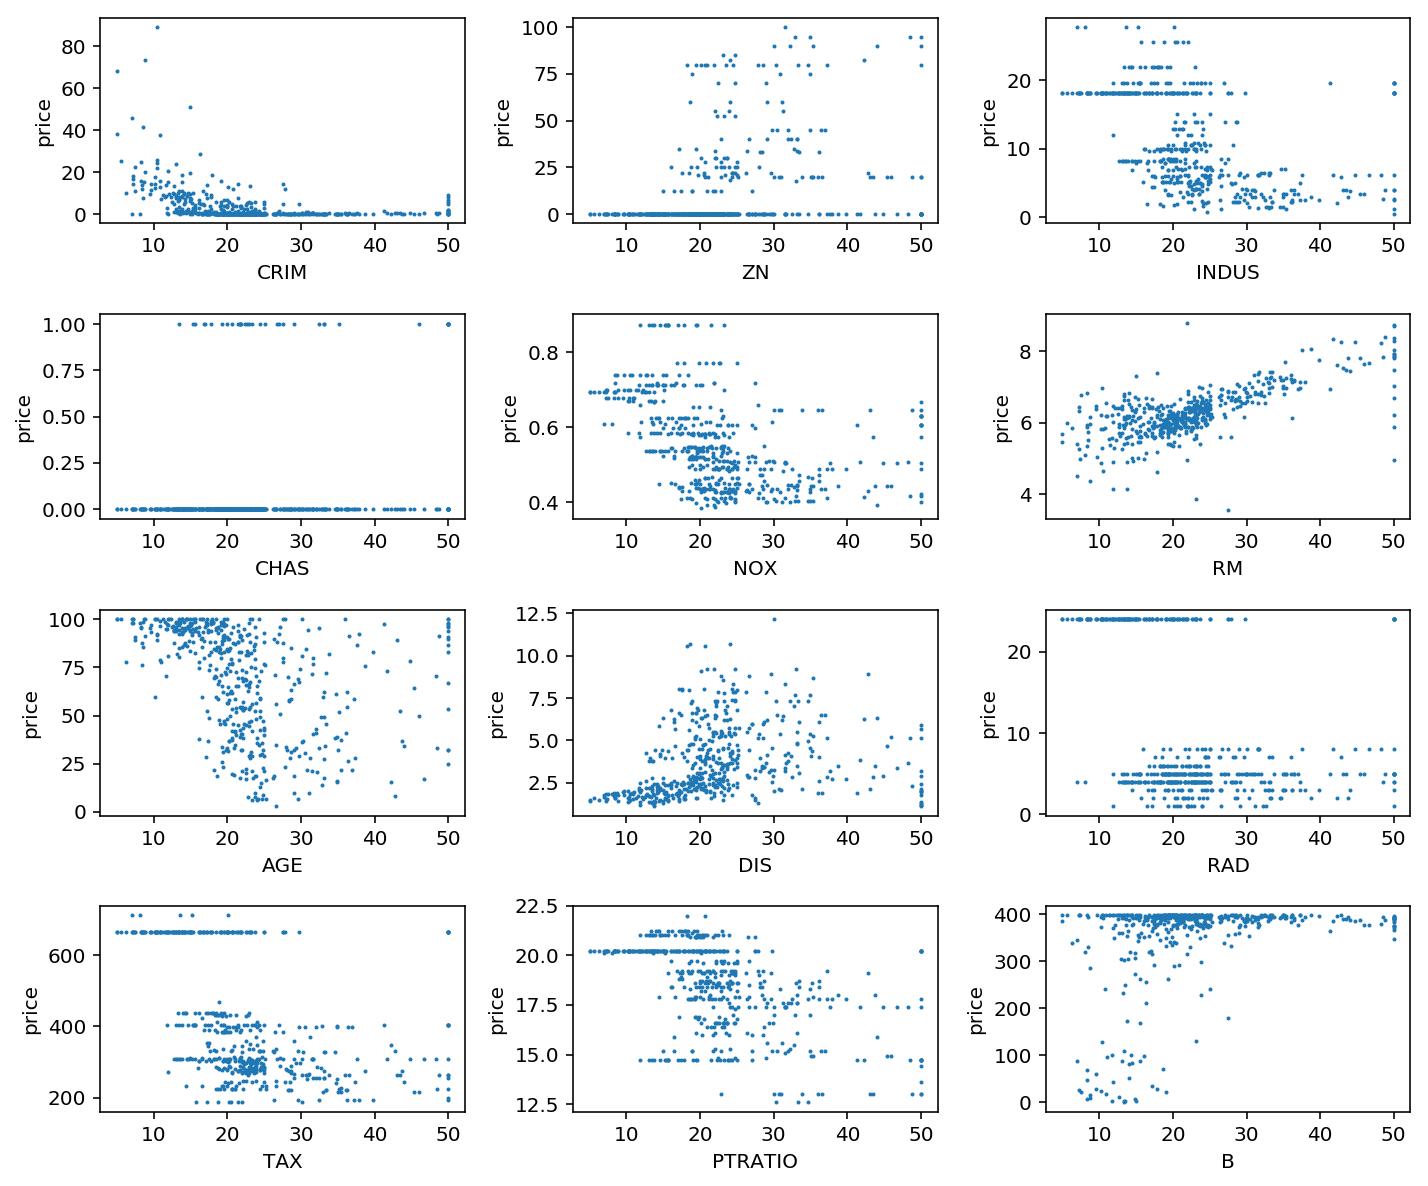

In [63]:
#寫迴圈把圖表畫出來
plt.figure(figsize=(10,10))
for i in range(len(df.columns)-1):
    dd=df[df.columns[i]]
    plt.subplot(5,3,i+1)
    plt.scatter(a.target,dd,s=1)
    plt.ylabel('price')
    plt.xlabel(df.columns[i])
plt.tight_layout()
plt.show()

## 用我們的資料作趨勢分析


In [65]:
df=pd.read_excel('data.xlsx',sheet_name='一次回歸')
df.head()

A         B
0  0.000000  0.672927
1  0.102041  0.637882
2  0.204082  1.293352
3  0.306122  1.120436
4  0.408163  1.621960

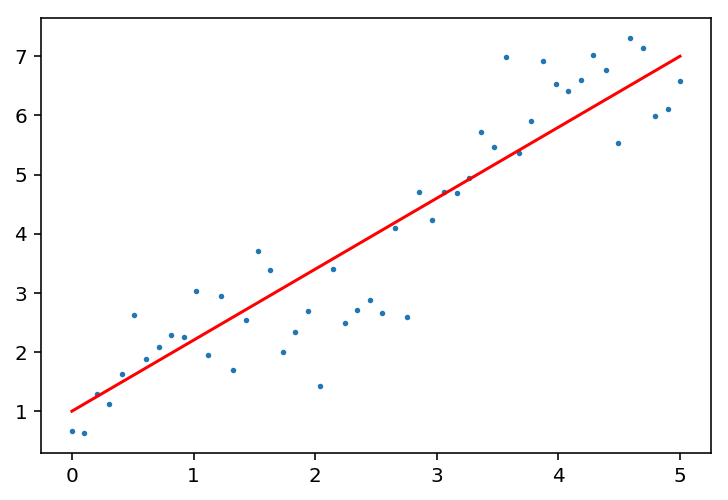

In [67]:
plt.scatter(df['A'],df['B'],s=3)
plt.plot([0,5],[1,7],'r')
plt.show()

In [68]:
from sklearn.linear_model import LinearRegression
# from sklearn.datasets import load_boston

In [69]:
regr=LinearRegression()

In [76]:
A=df['A'].values
A=A.reshape(len(A),1)
A

array([[0.      ],
       [0.102041],
       [0.204082],
       [0.306122],
       [0.408163],
       [0.510204],
       [0.612245],
       [0.714286],
       [0.816327],
       [0.918367],
       [1.020408],
       [1.122449],
       [1.22449 ],
       [1.326531],
       [1.428571],
       [1.530612],
       [1.632653],
       [1.734694],
       [1.836735],
       [1.938776],
       [2.040816],
       [2.142857],
       [2.244898],
       [2.346939],
       [2.44898 ],
       [2.55102 ],
       [2.653061],
       [2.755102],
       [2.857143],
       [2.959184],
       [3.061224],
       [3.163265],
       [3.265306],
       [3.367347],
       [3.469388],
       [3.571429],
       [3.673469],
       [3.77551 ],
       [3.877551],
       [3.979592],
       [4.081633],
       [4.183673],
       [4.285714],
       [4.387755],
       [4.489796],
       [4.591837],
       [4.693878],
       [4.795918],
       [4.897959],
       [5.      ]])

In [77]:
regr.fit(A,df['B'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
#截距
regr.intercept_

0.7773807756614066

In [79]:
#斜率
regr.coef_

array([1.26236145])

In [94]:
#直線方程式
預測=8
regr.coef_*預測+regr.intercept_

array([10.87627237])

In [82]:
B=regr.predict(A)
B

array([0.77738078, 0.9061934 , 1.03500603, 1.16381739, 1.29263001,
       1.42144264, 1.55025526, 1.67906789, 1.80788051, 1.93669187,
       2.0655045 , 2.19431712, 2.32312975, 2.45194237, 2.58075373,
       2.70956636, 2.83837898, 2.96719161, 3.09600423, 3.22481686,
       3.35362822, 3.48244084, 3.61125347, 3.74006609, 3.86887872,
       3.99769008, 4.12650271, 4.25531533, 4.38412796, 4.51294058,
       4.64175194, 4.77056457, 4.89937719, 5.02818982, 5.15700244,
       5.28581507, 5.41462643, 5.54343905, 5.67225168, 5.8010643 ,
       5.92987693, 6.05868829, 6.18750091, 6.31631354, 6.44512616,
       6.57393879, 6.70275141, 6.83156277, 6.9603754 , 7.08918802])

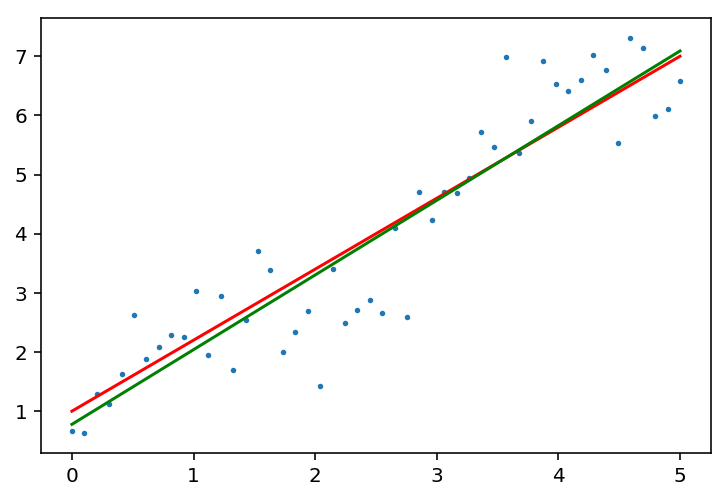

In [83]:

plt.scatter(df['A'],df['B'],s=3)
plt.plot([0,5],[1,7],'r')
plt.plot(df['A'],B,'g')
plt.show()

In [92]:
C=regr.predict([[8]])
C

array([10.87627237])

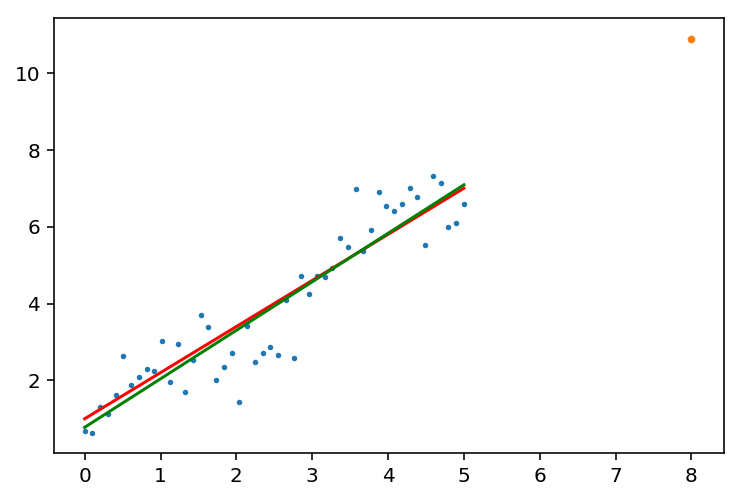

In [90]:

plt.scatter(df['A'],df['B'],s=3)
plt.plot([0,5],[1,7],'r')
plt.plot(df['A'],B,'g')
plt.scatter(8,C,s=8)
plt.show()

## 如果想要做更多比對

In [95]:
import seaborn as sns

In [97]:
a=load_boston()
a.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [98]:
df=pd.DataFrame(a.data,columns=a.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

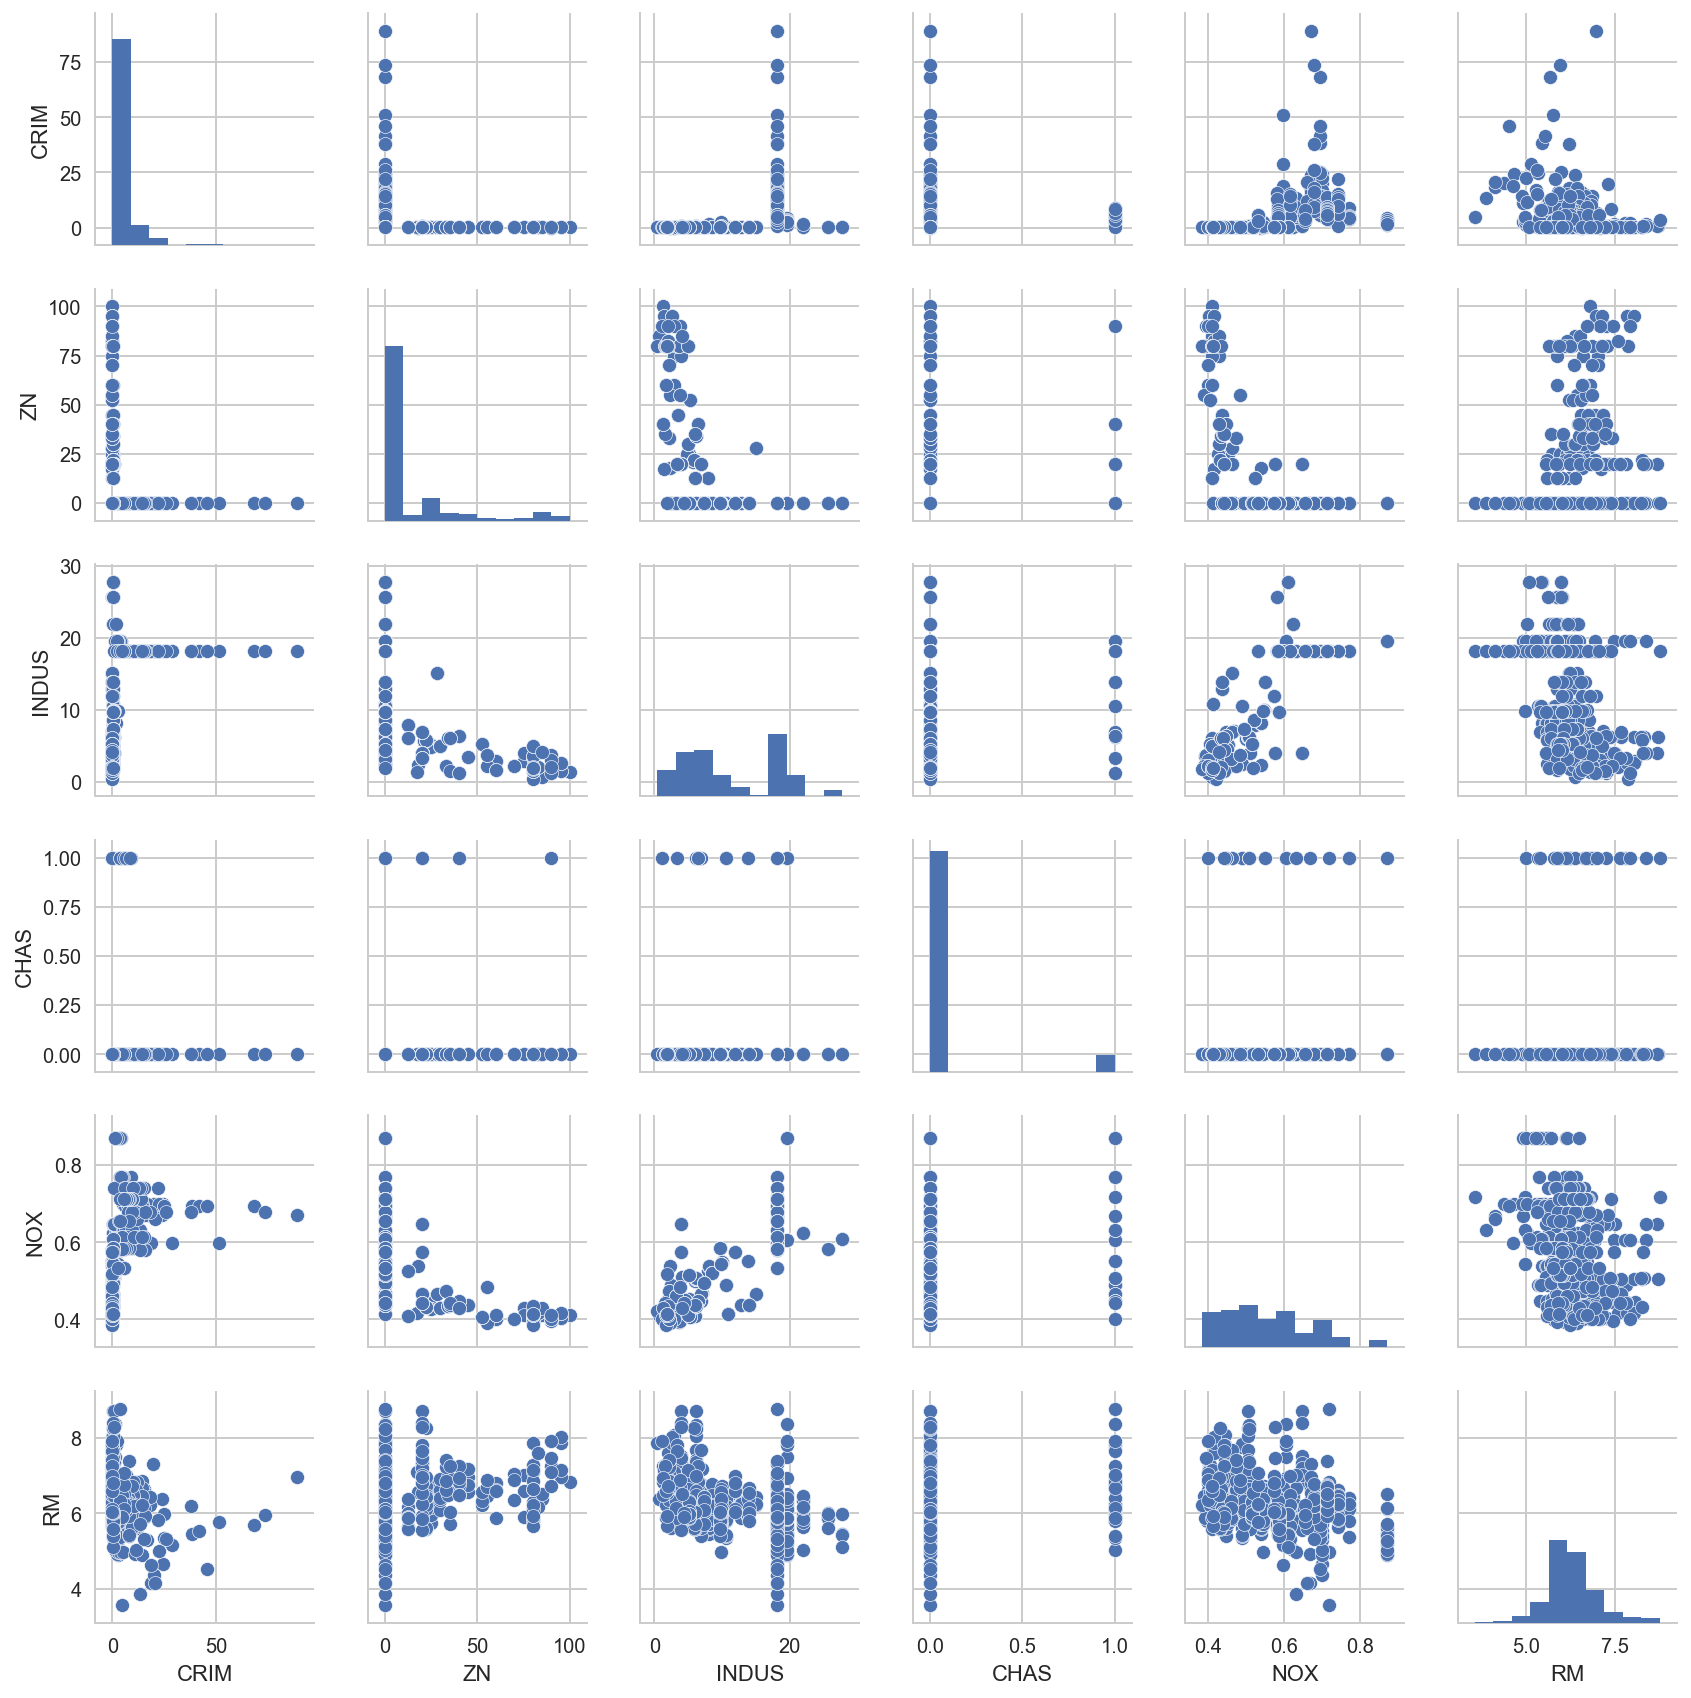

In [100]:
sns.set(style='whitegrid',context='notebook')
cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM']
sns.pairplot(df[cols],size=2)
plt.show()

### 皮爾遜矩陣

In [105]:
df[cols].values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.9760e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.7940e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.0300e+00]])

In [104]:
np.transpose(df[cols].values)

array([[6.3200e-03, 2.7310e-02, 2.7290e-02, ..., 6.0760e-02, 1.0959e-01,
        4.7410e-02],
       [1.8000e+01, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.3100e+00, 7.0700e+00, 7.0700e+00, ..., 1.1930e+01, 1.1930e+01,
        1.1930e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.3800e-01, 4.6900e-01, 4.6900e-01, ..., 5.7300e-01, 5.7300e-01,
        5.7300e-01],
       [6.5750e+00, 6.4210e+00, 7.1850e+00, ..., 6.9760e+00, 6.7940e+00,
        6.0300e+00]])

In [106]:
df[cols].values.T

array([[6.3200e-03, 2.7310e-02, 2.7290e-02, ..., 6.0760e-02, 1.0959e-01,
        4.7410e-02],
       [1.8000e+01, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.3100e+00, 7.0700e+00, 7.0700e+00, ..., 1.1930e+01, 1.1930e+01,
        1.1930e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.3800e-01, 4.6900e-01, 4.6900e-01, ..., 5.7300e-01, 5.7300e-01,
        5.7300e-01],
       [6.5750e+00, 6.4210e+00, 7.1850e+00, ..., 6.9760e+00, 6.7940e+00,
        6.0300e+00]])

In [109]:
cc=np.corrcoef(df[cols].values.T)
cc

array([[ 1.        , -0.19945796,  0.4044707 , -0.05529526,  0.41752143,
        -0.21993979],
       [-0.19945796,  1.        , -0.53382819, -0.04269672, -0.51660371,
         0.31199059],
       [ 0.4044707 , -0.53382819,  1.        ,  0.06293803,  0.76365145,
        -0.39167585],
       [-0.05529526, -0.04269672,  0.06293803,  1.        ,  0.09120281,
         0.09125123],
       [ 0.41752143, -0.51660371,  0.76365145,  0.09120281,  1.        ,
        -0.30218819],
       [-0.21993979,  0.31199059, -0.39167585,  0.09125123, -0.30218819,
         1.        ]])

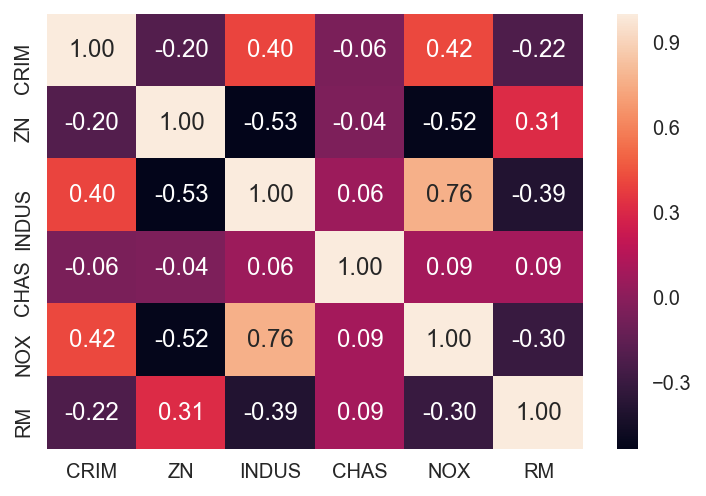

In [114]:
sns.heatmap(cc,cbar=True,annot=True,square=False,fmt='.2f',yticklabels=cols,xticklabels=cols)
plt.show()

## 寫個excel

In [115]:
import xlwt

In [119]:
book=xlwt.Workbook(encoding='utf-8')
sheet1=book.add_sheet('工作表1')
sheet1.write(2,1,100)
book.save('abc.xls')